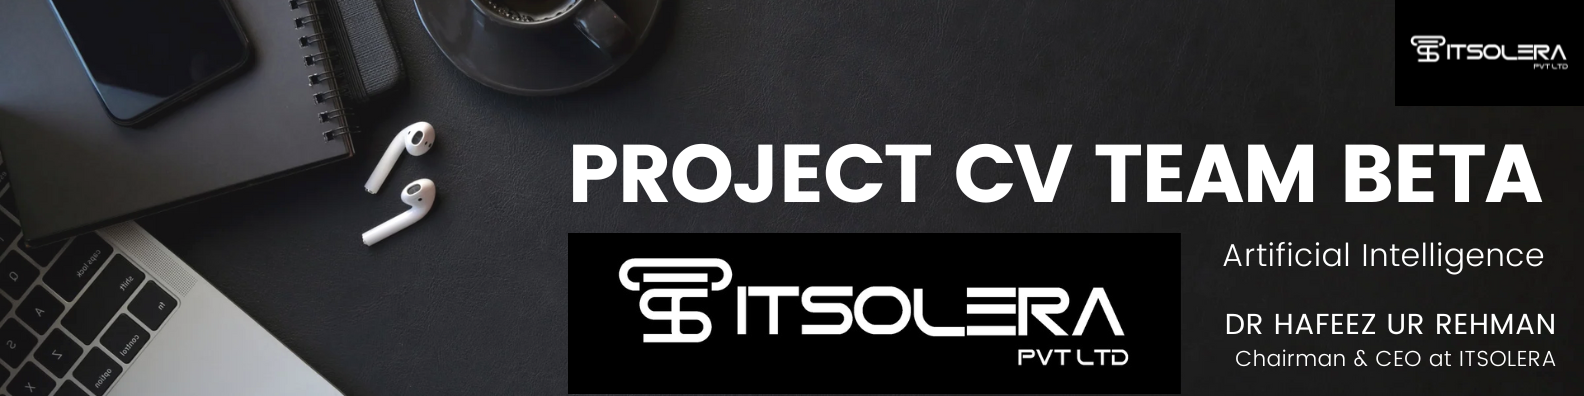

# Handwritten Digit Recognition

# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from skimage.feature import hog
from skimage import data, color, exposure
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# 1 Dataset Collection

• MNIST Dataset: Utilize the MNIST dataset, a widely-used benchmark dataset for
handwritten digit recognition, which contains 60,000 training images and 10,000 testing
images of handwritten digits.

In [ ]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the shapes of the dataset
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


# 2 Data Preprocessing

• Normalization: Normalize the pixel values to fall within a specific range (e.g., 0 to 1).
• Noise Reduction: Apply techniques such as Gaussian blur or median filtering to reduce
noise in the images.
• Data Augmentation: Perform data augmentation techniques such as rotation, scaling,
and translation to increase the diversity of the training data.


1.    *Normalize the pixel values to the range 0-1*

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

2.  *Noise Reduction using Gaussian blur*




In [ ]:
def apply_gaussian_blur(images):
    blurred_images = np.zeros_like(images)
    for i in range(images.shape[0]):
        blurred_images[i, :, :, 0] = cv2.GaussianBlur(images[i, :, :, 0], (5, 5), 0)
    return blurred_images

X_train = apply_gaussian_blur(X_train)
X_test = apply_gaussian_blur(X_test)

  3. *Data Augmentation*

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
# Fit the data generator on the training data
datagen.fit(X_train)

  3.1.*Checking the augmented images*

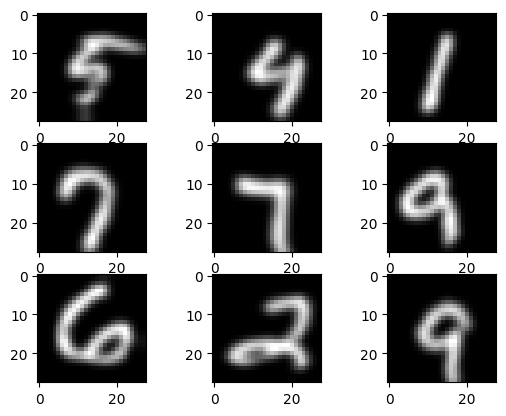

In [ ]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

# 3 Feature Extraction

• Pixel Intensity: Use raw pixel intensity values as features.
• Histogram of Oriented Gradients (HOG): Extract HOG features to capture edge
information.
• Principal Component Analysis (PCA): Reduce the dimensionality of the data while
preserving important information.

3.1. *Histogram of Oriented Gradients (HOG)*

In [ ]:
import numpy as np

def extract_hog_features(images):
    hog_features = []
    for image in images:
        feature = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, channel_axis=-1)
        hog_features.append(feature)
    return np.array(hog_features)

# Extract HOG features for training and testing data
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)
print(f'HOG features shape: {X_train_hog.shape}')

HOG features shape: (60000, 144)


3.2 *Principal Component Analysis (PCA):*

In [ ]:
# Flatten the raw pixel intensity images for PCA
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)
print(f'PCA features shape: {X_train_pca.shape}')

PCA features shape: (60000, 40)


3.3 *Raw Pixel Intensity:*  The raw pixel intensity values are already part of X_train and X_test after normalization and reshaping.



In [ ]:
print(f'Raw pixel intensity features shape: {X_train_flat.shape}')

Raw pixel intensity features shape: (60000, 784)


# 4 Model Selection
• Traditional Models: Implement k-NN, SVM, and Random Forest classifiers.
• Deep Learning Models: Develop and train CNNs, experimenting with different
architectures and hyperparameters.

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images for the models
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize the pixel values
x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0


# 5 Training and Evaluation
• Training: Split the dataset into training, validation, and test sets. Train the models using
the training set and tune hyperparameters using the validation set.
• Evaluation Metrics: Evaluate the models using accuracy, precision, recall, and F1 score.
Perform cross-validation to ensure robustness.

*Deep Learning Model: CNNs*

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 0.1427 - accuracy: 0.9563 - val_loss: 0.0511 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0401 - val_accuracy: 0.9891
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0344 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0289 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0288 - val_accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.0298 - val_accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.0261 - val_accur

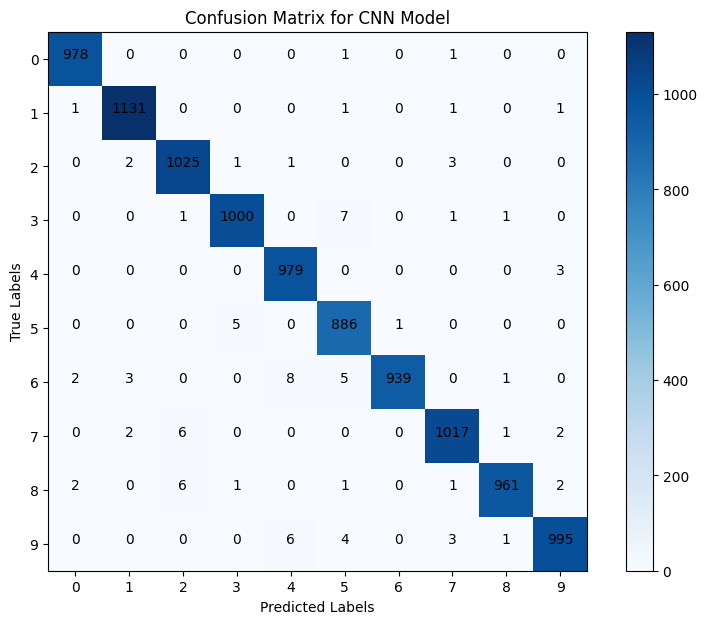

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Reshape the data for CNN
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels for CNN
y_train_cnn = to_categorical(y_train, 10)
y_test_cnn = to_categorical(y_test, 10)

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(x_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_data=(x_test_cnn, y_test_cnn))

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test_cnn)
print(f'CNN Accuracy: {cnn_accuracy * 100:.2f}%')

# Predict and evaluate the CNN model
y_pred_cnn = cnn_model.predict(x_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
y_test_cnn_classes = np.argmax(y_test_cnn, axis=1)

# Calculate precision, recall, and F1 score
precision_cnn = precision_score(y_test_cnn_classes, y_pred_cnn_classes, average='weighted')
recall_cnn = recall_score(y_test_cnn_classes, y_pred_cnn_classes, average='weighted')
f1_cnn = f1_score(y_test_cnn_classes, y_pred_cnn_classes, average='weighted')

print(f'CNN Precision: {precision_cnn * 100:.2f}%')
print(f'CNN Recall: {recall_cnn * 100:.2f}%')
print(f'CNN F1 Score: {f1_cnn * 100:.2f}%')

# Generate confusion matrix
conf_matrix_cnn = confusion_matrix(y_test_cnn_classes, y_pred_cnn_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix_cnn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for CNN Model')
plt.colorbar()
tick_marks = range(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Annotate the confusion matrix
for i in range(len(tick_marks)):
    for j in range(len(tick_marks)):
        plt.text(j, i, conf_matrix_cnn[i, j], horizontalalignment="center")

plt.show()

# Generate classification report
class_report_cnn = classification_report(y_test_cnn_classes, y_pred_cnn_classes)
print('Classification Report:')
print(class_report_cnn)


*Saving CNN Model File*

In [ ]:
cnn_model.save('/content/drive/MyDrive/handwritten Digit Recognition Model/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


*Traditional Models: k-NN*

KNN Accuracy: 97.05%
KNN Precision: 97.07%
KNN Recall: 97.05%
KNN F1 Score: 97.05%


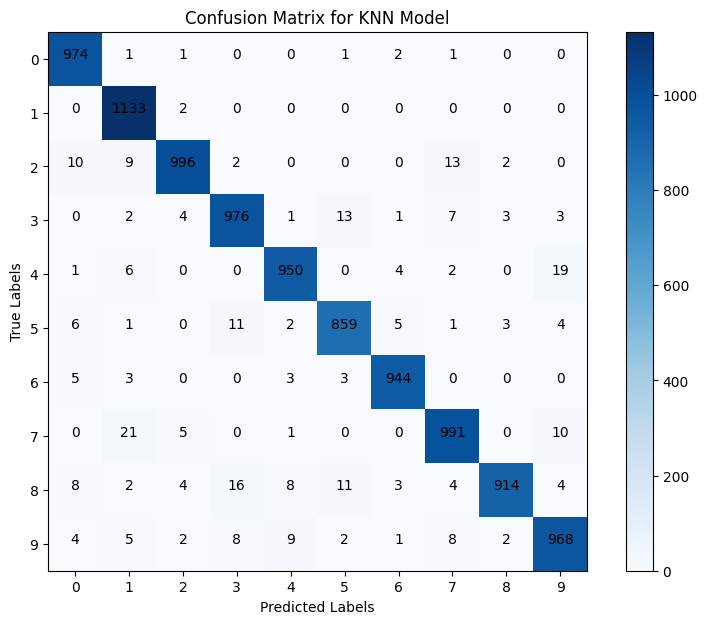

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# Create and train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_flat, y_train)

# Predict and evaluate the KNN model
y_pred_knn = knn_model.predict(x_test_flat)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')

# Calculate precision, recall, and F1 score
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f'KNN Precision: {precision_knn * 100:.2f}%')
print(f'KNN Recall: {recall_knn * 100:.2f}%')
print(f'KNN F1 Score: {f1_knn * 100:.2f}%')

# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN Model')
plt.colorbar()
tick_marks = range(len(set(y_test)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Annotate the confusion matrix
for i in range(len(tick_marks)):
    for j in range(len(tick_marks)):
        plt.text(j, i, conf_matrix_knn[i, j], horizontalalignment="center")

plt.show()


# Generate classification report
class_report_knn = classification_report(y_test, y_pred_knn)
print('Classification Report:')
print(class_report_knn)



*Traditional Models: SVM*

SVM Accuracy: 94.04%
SVM Precision: 94.05%
SVM Recall: 94.04%
SVM F1 Score: 94.03%


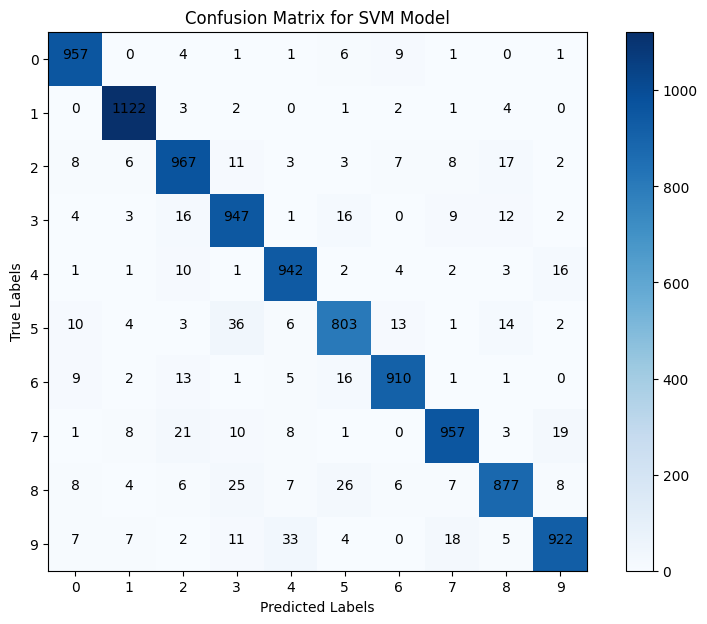

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_flat, y_train)

# Predict and evaluate the SVM model
y_pred_svm = svm_model.predict(x_test_flat)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')

precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f'SVM Precision: {precision_svm * 100:.2f}%')
print(f'SVM Recall: {recall_svm * 100:.2f}%')
print(f'SVM F1 Score: {f1_svm * 100:.2f}%')

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Model')
plt.colorbar()
tick_marks = range(len(set(y_test)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Annotate the confusion matrix
for i in range(len(tick_marks)):
    for j in range(len(tick_marks)):
        plt.text(j, i, conf_matrix_svm[i, j], horizontalalignment="center")

plt.show()

# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm)
print('Classification Report:')
print(class_report_svm)


*Traditional Model: Random Forest classifiers*

Random Forest Accuracy: 97.04%
Random Forest Precision: 97.04%
Random Forest Recall: 97.04%
Random Forest F1 Score: 97.04%


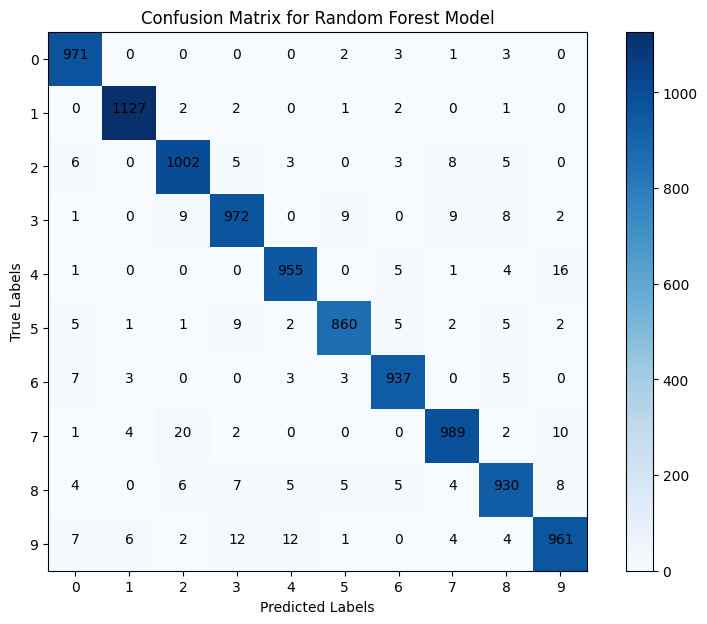

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_flat, y_train)

# Predict and evaluate the Random Forest model
y_pred_rf = rf_model.predict(x_test_flat)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

# Calculate precision, recall, and F1 score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f'Random Forest Precision: {precision_rf * 100:.2f}%')
print(f'Random Forest Recall: {recall_rf * 100:.2f}%')
print(f'Random Forest F1 Score: {f1_rf * 100:.2f}%')

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Model')
plt.colorbar()
tick_marks = range(len(set(y_test)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Annotate the confusion matrix
for i in range(len(tick_marks)):
    for j in range(len(tick_marks)):
        plt.text(j, i, conf_matrix_rf[i, j], horizontalalignment="center")

plt.show()

# Generate classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print('Classification Report:')
print(class_report_rf)


# 6 Predictions

In [ ]:
def visualize_predictions(images, true_labels, pred_labels, model_name, num_samples=5):
    plt.figure(figsize=(10, 2 * num_samples))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[i]}, Pred: {pred_labels[i]}")
        plt.axis('off')
    plt.suptitle(f"{model_name} Predictions", y=1.05, fontsize=16)
    plt.tight_layout()
    plt.show()

# Select a few sample images to visualize
num_samples = 5
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[sample_indices]
sample_images_flat = x_test_flat[sample_indices]
sample_labels = y_test[sample_indices]

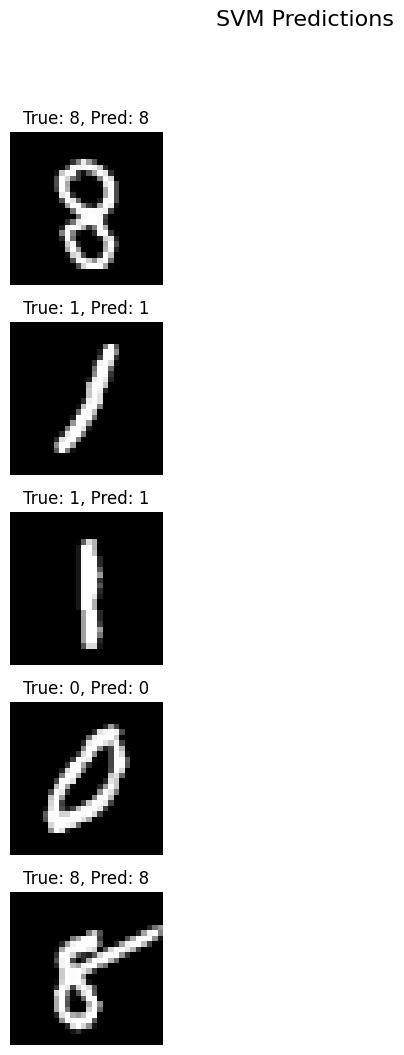

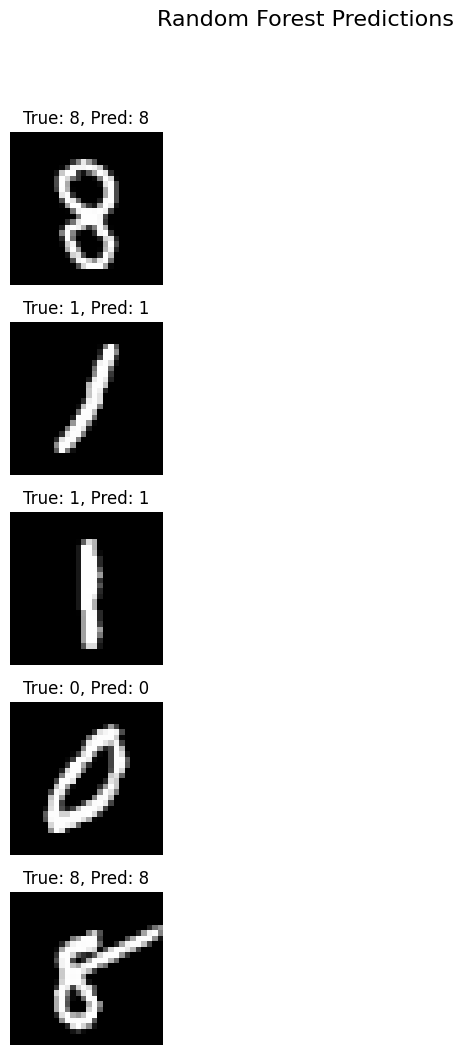

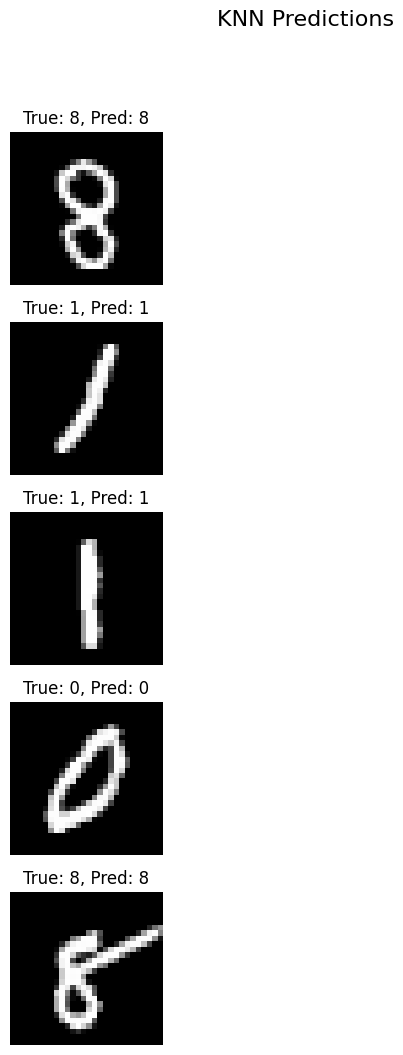

In [ ]:
# SVM Predictions
svm_pred_labels = svm_model.predict(sample_images_flat)
visualize_predictions(sample_images, sample_labels, svm_pred_labels, 'SVM', num_samples)

# Random Forest Predictions
rf_pred_labels = rf_model.predict(sample_images_flat)
visualize_predictions(sample_images, sample_labels, rf_pred_labels, 'Random Forest', num_samples)

# KNN Predictions
knn_pred_labels = knn_model.predict(sample_images_flat)
visualize_predictions(sample_images, sample_labels, knn_pred_labels, 'KNN', num_samples)


# Real-time CNN Model Predictions

1/1 [==============================] - 0s 35ms/step


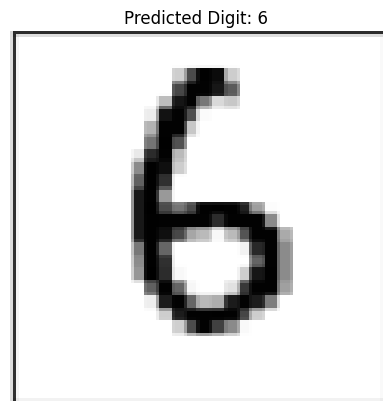

In [ ]:
# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0  # Normalize
    img_array = img_array.reshape((1, 28, 28, 1))  # Reshape to fit the model input shape
    return img_array

# Function to make prediction
def predict_image(image_path):
    img_array = load_and_preprocess_image(image_path)
    prediction = cnn_model.predict(img_array)
    predicted_digit = np.argmax(prediction)
    return predicted_digit

# Visualize the prediction
def visualize_prediction(image_path):
    img = Image.open(image_path).convert('L')
    predicted_digit = predict_image(image_path)

    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit}')
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/six_digit.png'
visualize_prediction(image_path)
